# T09 - Resampling
## Ana Sofía Hinojosa Bale

# Conceptual

1. Using basic statistical properties of the variance, as well as singlevariable calculus, derive (5.6). In other words, prove that α given by (5.6) does indeed minimize Var(αX + (1 − α)Y ).

$$
\sigma_X^2 = \mathrm{Var}(X), \qquad
\sigma_Y^2 = \mathrm{Var}(Y), \qquad
\sigma_{XY} = \mathrm{Cov}(X,Y).
$$

Using bilinearity of variance and covariance:

$$
\begin{aligned}
\mathrm{Var}(Z(\alpha))
&= \alpha^2 \sigma_X^2
  + (1-\alpha)^2 \sigma_Y^2
  + 2\alpha(1-\alpha)\sigma_{XY}.
\end{aligned}
$$

Differentiating:

$$
V'(\alpha)
= 2\alpha \sigma_X^2
  - 2(1-\alpha)\sigma_Y^2
  + 2(1 - 2\alpha)\sigma_{XY}.
$$

$$
2\alpha \sigma_X^2
- 2(1-\alpha)\sigma_Y^2
+ 2(1 - 2\alpha)\sigma_{XY} = 0.
$$


$$
\alpha \sigma_X^2
- (1-\alpha)\sigma_Y^2
+ (1-2\alpha)\sigma_{XY} = 0.
$$

Solving for alpha:

$$
\alpha \sigma_X^2 - \sigma_Y^2 + \alpha \sigma_Y^2
+ \sigma_{XY} - 2\alpha \sigma_{XY} = 0.
$$

$$
\alpha(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY})
+ (\sigma_{XY} - \sigma_Y^2) = 0.
$$

$$
\alpha(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY})
= \sigma_Y^2 - \sigma_{XY}.
$$

$$
\boxed{
\alpha =
\frac{\sigma_Y^2 - \sigma_{XY}}
     {\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}
}
$$


To confirm it is a minimum:

$$
V''(\alpha)
= 2(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY})
= 2\,\mathrm{Var}(X - Y).
$$



2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

**What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.**

Each bootstrap draw is made uniformly at random from the $n$ original observations, and sampling is done with replacement.
Therefore, the probability of selecting the j-th observation is  

$$P(j) = \frac{1}{n}$$

So, the probability of not selecting the $j$-th observation is the complement:

$$
P(\text{not } j) = 1 - \frac{1}{n}.
$$

**What is the probability that the second bootstrap observation is not the jth observation from the original sample?**

Because bootstrap uses replacement, each observation is independent, meaning it would still be:

$$
P(\text{not } j) = 1 - \frac{1}{n}.
$$

**Argue that the probability that the jth observation is not in the bootstrap sample is $(1 − 1/n)^n$.**

A bootstrap sample of size $n$ contains $n$ independent draws.

On each draw, the probability of *not* selecting the $j$-th observation is

$$
1 - \frac{1}{n}
$$

Since the draws are independent, the probability that the $j$-th observation is never selected in any of the $n$ draws is

$$
P(\text{not selected in any of the $n$ draws}) 
= \left(1 - \frac{1}{n}\right)^n
$$

**When n = 5, what is the probability that the jth observation is in the bootstrap sample?**

$$
P(\text{j is in sample}) = 1 - (1 - \frac{1}{5})^5 = 0.6723
$$

**When n = 100, what is the probability that the jth observation is in the bootstrap sample?**

$$
P(\text{j is in sample}) = 1 - (1 - \frac{1}{100})^100 = 0.6339
$$

**When n = 10, 000, what is the probability that the jth observation is in the bootstrap sample?**

$$
P(\text{j is in sample}) = 1 - (1 - \frac{1}{10,000})^{10,000} = 0.6321
$$

**Create a plot that displays, for each integer value of n from 1 to 100, 000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.**


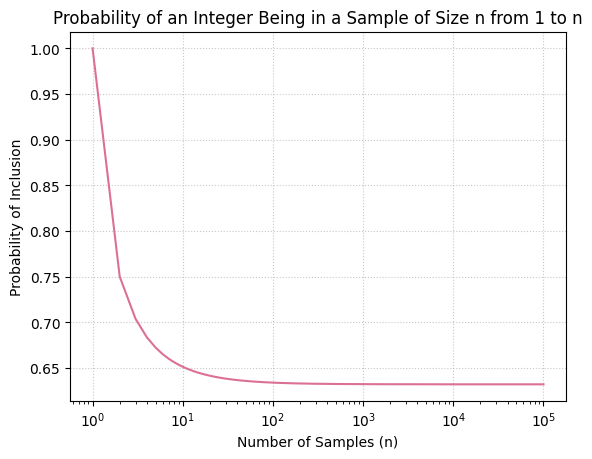

In [321]:
import numpy as np
import matplotlib.pyplot as plt

integer_values = np.linspace(1, 100_000, 100_000, dtype=int)

def prob(n):

    probability_is_in_sample = 1 - ((n - 1) / n) ** n
    return probability_is_in_sample

probabilities = prob(integer_values)

plt.plot(integer_values, probabilities, color='palevioletred')
plt.grid(linestyle=':', alpha=0.7)
plt.xlabel('Number of Samples (n)')
plt.ylabel('Probability of Inclusion')
plt.title('Probability of an Integer Being in a Sample of Size n from 1 to n')
plt.xscale('log')

**We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We first create an array store with values that will subsequently be overwritten using the function np.empty(). We then repeatedly create bootstrap samples, and each time we record whether or not the fifth observation is contained in the bootstrap sample.**

In [322]:
n = 100
j = 4
trials = 10000

store = np.empty(trials)

for t in range(trials):
    sample = np.random.choice(np.arange(n), size=n, replace=True)
    store[t] = (j in sample)

store.mean()

np.float64(0.6298)

In [323]:
rng = np.random.default_rng(10)
store = np.empty(10000)

for i in range(10000):
    store[i] = (np.sum(rng.choice(100, size=100, replace=True) == 4) > 0)

np.mean(store)

np.float64(0.6362)

The first code is the one I made, the second one, the one given by the book. In both cases, the mean from the stored results give a value close to the one that is shown in the plot before, the value that the probabilities start to converge to.

3. We now review k-fold cross-validation.
**Explain how k-fold cross-validation is implemented.**

K-fold cross-validation works the following way:

The dataset is divided into *k* equal parts, for each of these parts the *k* part of the dataset is used as the test set and the remaining parts combined as the train set. This way the model is tested oon all *k* divisions, and the model can be evaluated on its performance across all of them.

**What are the advantages and disadvantages of k-fold cross-validation relative to:**
i. The validation set approach?

A main advantage of k-fold cross-validation is that it gives a more stable estimate of test error. The validation set approach uses only one split of the data, so the estimate can change a lot depending on how the split is made. K-fold cross-validation averages over several splits, which reduces this variability. It also uses more of the data for training in each iteration, which usually leads to better model performance.

The main disadvantage is that k-fold cross-validation requires fitting the model several times, so it takes more computation than the validation set approach.

ii. LOOCV?

K-fold cross-validation is much faster than LOOCV, because LOOCV requires fitting the model once for every observation in the dataset, while k-fold cross-validation fits it only a small number of times. K-fold cross-validation also tends to have lower variance, because LOOCV training sets differ by only one point and can give unstable results.

However, k-fold cross-validation can sometimes give a slightly less accurate estimate of test performance than LOOCV, because each model is trained on a smaller portion of the data. LOOCV uses almost the entire dataset for training each time, so it can provide a more precise sense of how the model performs when trained on all available observations.

4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X.
Carefully describe how we might estimate the standard deviation of
our prediction.

To estimate how uncertain a prediction is, we can use the bootstrap. The idea is to repeatedly create new datasets by sampling from the original data with replacement. Each of these new datasets is called a bootstrap sample. For every bootstrap sample, we fit the same model and make a prediction at the value of interest. This gives us many slightly different predictions, one from each bootstrap sample. The variation among these predictions tells us how sensitive the model is to changes in the data. We then measure how spread out these predictions are, and this spread gives us an estimate of the standard deviation of our original prediction. In short, by refitting the model many times on resampled versions of the data, we can see how much the prediction tends to change, which provides a practical estimate of its uncertainty.

# Applied

### Problem 5

In [324]:
import pandas as pd
from sklearn.utils import resample
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from ISLP import load_data

a)

In [325]:
default = load_data('Default')
default["default"] = (default["default"] == "Yes").astype(int)
default = default.drop(columns=["student"])

In [326]:
x = default.drop(columns=["default"])
y = default["default"]
model_initial = sm.Logit(y, sm.add_constant(x)).fit()
model_initial.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Nov 2025   Pseudo R-squ.:                  0.4594
Time:                        16:46:32   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

b)

In [327]:
train, test = train_test_split(default, test_size=0.3, random_state=42)
x_train = train.drop(columns=["default"])
y_train = train["default"]
x_test = test.drop(columns=["default"])
y_test = test["default"]
model_default = sm.Logit(y_train, sm.add_constant(x_train)).fit()
model_default.summary()

Optimization terminated successfully.
         Current function value: 0.078256
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6997
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Nov 2025   Pseudo R-squ.:                  0.4743
Time:                        16:46:32   Log-Likelihood:                -547.79
converged:                       True   LL-Null:                       -1042.0
Covariance Type:            nonrobust   LLR p-value:                2.273e-215
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.6019      0.522    -22.236      0.000     -12.624     -10.579
balance        0.0057      0.000     20.976      0.000       0.005       0.006
income      1.872e-05   5.92e-06      3.163      0.002    7.12e-06    3.03e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [328]:
pred = model_default.predict(sm.add_constant(x_test))
pred_class = (pred >= 0.5).astype(int)
validation_error = np.mean(pred_class != y_test)
validation_error

np.float64(0.02666666666666667)

c)

In [329]:
train, test = train_test_split(default, test_size=0.3, random_state=10)
x_train = train.drop(columns=["default"])
y_train = train["default"]
x_test = test.drop(columns=["default"])
y_test = test["default"]
model_default = sm.Logit(y_train, sm.add_constant(x_train)).fit()
pred = model_default.predict(sm.add_constant(x_test))
pred_class = (pred >= 0.5).astype(int)
validation_error = np.mean(pred_class != y_test)
validation_error

Optimization terminated successfully.
         Current function value: 0.074116
         Iterations 10


np.float64(0.029666666666666668)

In [330]:
train, test = train_test_split(default, test_size=0.3, random_state=5)
x_train = train.drop(columns=["default"])
y_train = train["default"]
x_test = test.drop(columns=["default"])
y_test = test["default"]
model_default = sm.Logit(y_train, sm.add_constant(x_train)).fit()
pred = model_default.predict(sm.add_constant(x_test))
pred_class = (pred >= 0.5).astype(int)
validation_error = np.mean(pred_class != y_test)
validation_error

Optimization terminated successfully.
         Current function value: 0.080827
         Iterations 10


np.float64(0.025)

In [331]:
train, test = train_test_split(default, test_size=0.3, random_state=123)
x_train = train.drop(columns=["default"])
y_train = train["default"]
x_test = test.drop(columns=["default"])
y_test = test["default"]
model_default = sm.Logit(y_train, sm.add_constant(x_train)).fit()
pred = model_default.predict(sm.add_constant(x_test))
pred_class = (pred >= 0.5).astype(int)
validation_error = np.mean(pred_class != y_test)
validation_error

Optimization terminated successfully.
         Current function value: 0.081061
         Iterations 10


np.float64(0.025666666666666667)

#### Commentary on results

The validation error across the four different splits varied slightly, ranging from 0.025 to 0.0296. Although this variation is small, it demonstrates that the randomness in the train-test split can affect model performance, since the model is trained on the training data and evaluated on the test data.

d)

In [332]:
default = load_data('Default')
default["default"] = (default["default"] == "Yes").astype(int)
default["student"] = (default["student"] == "Yes").astype(int)

train, test = train_test_split(default, test_size=0.3, random_state=42)
x_train = train.drop(columns=["default"])
y_train = train["default"]
x_test = test.drop(columns=["default"])
y_test = test["default"]
model_default = sm.Logit(y_train, sm.add_constant(x_train)).fit()
model_default.summary()

Optimization terminated successfully.
         Current function value: 0.078031
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6996
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Nov 2025   Pseudo R-squ.:                  0.4758
Time:                        16:46:32   Log-Likelihood:                -546.22
converged:                       True   LL-Null:                       -1042.0
Covariance Type:            nonrobust   LLR p-value:                1.189e-214
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.0709      0.595    -18.620      0.000     -12.236      -9.906
student       -0.5051      0.284     -1.780      0.075      -1.061       0.051
balance        0.0058      0.000     20.872      0.000       0.005       0.006
income      4.794e-06   9.83e-06      0.488      0.626   -1.45e-05    2.41e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [333]:
pred = model_default.predict(sm.add_constant(x_test))
pred_class = (pred >= 0.5).astype(int)
validation_error = np.mean(pred_class != y_test)
validation_error

np.float64(0.02666666666666667)

#### Commentary on results

The inclusion of a dummy variable in this model did not lead to a significant improvement over the original model for this specific train-test split. The validation error remained at 0.0267. It is also worth noting that the variable's p-value is 0.075, which is greater than 0.05, so statistically, it cannot be concluded that the variable has an effect on the target.

### Problem 6

a)

In [334]:
rng = np.random.default_rng(10) 

In [335]:
model_logit = model_initial
model_logit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Nov 2025   Pseudo R-squ.:                  0.4594
Time:                        16:46:32   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [336]:
se_income = model_logit.bse["income"]
se_balance = model_logit.bse["balance"]
se_income, se_balance

(np.float64(4.985245461753143e-06), np.float64(0.0002273813847684742))

In [337]:
model_glm = sm.GLM(y, sm.add_constant(x), family=sm.families.Binomial()).fit()
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Mon, 24 Nov 2025   Deviance:                       1579.0
Time:                        16:46:32   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================
"""

In [338]:
se_income = model_glm.bse["income"]
se_balance = model_glm.bse["balance"]

se_income, se_balance

(np.float64(4.985245458257298e-06), np.float64(0.00022738138440210308))

b)

In [339]:
import warnings
def boot_fn(data, index):
    sample = data.iloc[index, :]

    X_boot = sm.add_constant(sample[["income", "balance"]])
    y_boot = (sample["default"] == "Yes").astype(int)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        model = sm.GLM(
            y_boot,
            X_boot,
            family=sm.families.Binomial()
        ).fit()

    return model.params[["income", "balance"]]

c)

#### Logit with bootstrap in loop iteration

In [340]:
n_bootstraps = 1000
bootstrap_estimates = []

for i in range(n_bootstraps):
    boot_sample = resample(default, replace=True, n_samples=len(default))
    X_boot = boot_sample.drop(columns=["default"])
    y_boot = boot_sample["default"]
    X_boot = sm.add_constant(X_boot)

    try:
        model_boot = sm.Logit(y_boot, X_boot).fit(disp=0)
        coef = model_boot.params[["income", "balance"]]
        bootstrap_estimates.append(coef)

    except:
        continue

bootstrap_estimates = np.vstack(bootstrap_estimates)
se_income, se_balance = bootstrap_estimates.std(axis=0)
se_income, se_balance


(np.float64(8.580889864214244e-06), np.float64(0.00022881794350160673))

#### GLM with bootstrap function

In [341]:
B = 1000
estimates = []
estimates_b =[]
default = load_data('Default')
n = len(default)

for b in range(B):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        idx = np.random.choice(n, n, replace=True)
        coef = boot_fn(default, idx)
        X = default[["income", "balance"]]
        y = (default["default"] == "Yes").astype(int)
        X_b = X.iloc[idx, :]
        y_b = y.iloc[idx]
        X_b = sm.add_constant(X_b)

        model_b = sm.GLM(y_b, X_b, family=sm.families.Binomial()).fit()
        coef_b = model_b.params[["income", "balance"]]
        estimates_b.append(coef_b)
        
        if coef is not None: 
            estimates.append(coef)

bootstrap_estimates = np.vstack(estimates)
estimates_b = np.vstack(estimates_b)
se_income, se_balance = bootstrap_estimates.std(axis=0)
se_bi, se_bb = estimates_b.std(axis=0)
se_income, se_balance, se_bi, se_bb

(np.float64(4.949647671827223e-06),
 np.float64(0.00022816928704674777),
 np.float64(4.949647671827223e-06),
 np.float64(0.00022816928704674777))

d)

#### Commentary on results

The standard errors for each variable changed from 4.9852×10⁻⁶ and 0.0002274 to 8.3493×10⁻⁶ and 0.000228 after the bootstrap process. This shows that, while the results are similar, there are slight differences, indicating that the bootstrap errors are slightly greater than the original ones. This suggests that the original estimates may slightly underestimate the true variability of the model parameters, and using bootstrap provides a more robust measure of uncertainty.

### Problem 7

a)

In [342]:
from ISLP import load_data
weekly = load_data("Weekly")
weekly['Direction'] = (weekly['Direction'] == 'Up').astype(int)
x = weekly[['Lag1', 'Lag2']]
y = weekly['Direction']

In [343]:
model_weekly = sm.Logit(y, sm.add_constant(x)).fit()
model_weekly.summary()

Optimization terminated successfully.
         Current function value: 0.683297
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Nov 2025   Pseudo R-squ.:                0.005335
Time:                        16:46:50   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

b)

In [344]:
x_wo_first = x.iloc[1:]
y_wo_first = y.iloc[1:]
model_weekly_wo_first = sm.Logit(
    y_wo_first,
    sm.add_constant(x_wo_first)
).fit()

model_weekly_wo_first.summary()

Optimization terminated successfully.
         Current function value: 0.683147
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Nov 2025   Pseudo R-squ.:                0.005387
Time:                        16:46:50   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
Covariance Type:            nonrobust   LLR p-value:                   0.01785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
==============================================================================
"""

c)

In [345]:
x_first = x.iloc[[0]]
y_first = y.iloc[[0]]
x_first_const = sm.add_constant(x_first, has_constant='add')

pred_first = model_weekly_wo_first.predict(x_first_const)
first_class = (pred_first >= 0.5).astype(int)

print("Predicted probability for first value:", pred_first.values[0])
print("Predicted class for first value:", first_class.values[0])
print("Real class for first value:", y_first.values[0])
print("Is it correct?", first_class.values[0] == y_first.values[0])

Predicted probability for first value: 0.5713923205204433
Predicted class for first value: 1
Real class for first value: 0
Is it correct? False


d)

In [346]:
n = len(weekly)
errors = np.zeros(n)

for i in range(n):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        train_x = x.drop(i)
        train_y = y.drop(i)
        test_x = x.iloc[i:i+1]
        test_y = y.iloc[i]

        train_x_const = sm.add_constant(train_x, has_constant='add')
        test_x_const = sm.add_constant(test_x, has_constant='add')

        model = sm.Logit(train_y, train_x_const).fit(disp=0)

        pred_prob = model.predict(test_x_const)
        pred_class = pred_prob >= 0.5

        errors[i] = int(pred_class != test_y)

e)

In [347]:
loocv_error = errors.mean()
loocv_error

np.float64(0.44995408631772266)

#### Commentary on results

The LOOCV error was 0.44995, which indicates that the model misclassified approximately 45% of the observations when each data point was left out and used as a test case. This relatively high error suggests that the model's predictive performance is limited, and it may struggle to generalize to new data. The LOOCV process provides a nearly unbiased estimate of the model’s true error since each observation is used once as a test case.

### Problem 8

a)

In [348]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

$n = \text{number of observations}$

$p = \text{number of predictors or features}$

$\text{In this case,}$

$n = 100$

$p = 1$

$\text{The model results in}$

$y = x - 2x^2 +\epsilon$

$\text{So, explicitly}$

$y_i = x_i - 2x_i^2 +\epsilon_i, \text{ for } i = 1, 2, ..., 100$

b)

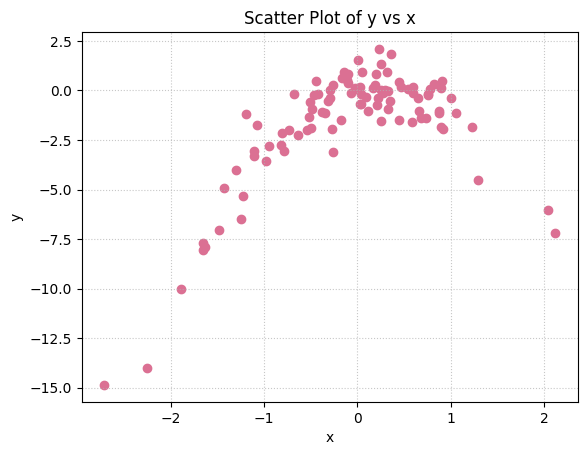

In [349]:
plt.scatter(x, y, color='palevioletred')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of y vs x')
plt.grid(linestyle=':', alpha=0.7)

c)

In [350]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

df = pd.DataFrame({"x": x, "y": y})

def loocv_error(df, degree):
    n = len(df)
    errors = np.zeros(n)

    for i in range(n):
        train = df.drop(i)
        test = df.iloc[i]

        X_train = np.column_stack([train["x"]**d for d in range(1, degree+1)])
        X_test = np.array([test["x"]**d for d in range(1, degree+1)]).reshape(1, -1)

        X_train = np.column_stack([np.ones(len(train)), X_train])
        X_test = np.column_stack([np.ones(1), X_test])

        y_train = train["y"]

        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_test)[0]
        errors[i] = (test["y"] - y_pred)**2

    return errors.mean()

loocv_deg1 = loocv_error(df, 1)
loocv_deg2 = loocv_error(df, 2)
loocv_deg3 = loocv_error(df, 3)
loocv_deg4 = loocv_error(df, 4)

loocv_deg1, loocv_deg2, loocv_deg3, loocv_deg4

(np.float64(6.633029839181983),
 np.float64(1.122936856341969),
 np.float64(1.3017965489358871),
 np.float64(1.3323942694179345))

d)

In [351]:
rng = np.random.default_rng(42)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

df = pd.DataFrame({"x": x, "y": y})

def loocv_error(df, degree):
    n = len(df)
    errors = np.zeros(n)

    for i in range(n):
        train = df.drop(i)
        test = df.iloc[i]

        X_train = np.column_stack([train["x"]**d for d in range(1, degree+1)])
        X_test = np.array([test["x"]**d for d in range(1, degree+1)]).reshape(1, -1)

        X_train = np.column_stack([np.ones(len(train)), X_train])
        X_test = np.column_stack([np.ones(1), X_test])

        y_train = train["y"]

        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_test)[0]
        errors[i] = (test["y"] - y_pred)**2

    return errors.mean()

loocv_deg1 = loocv_error(df, 1)
loocv_deg2 = loocv_error(df, 2)
loocv_deg3 = loocv_error(df, 3)
loocv_deg4 = loocv_error(df, 4)

loocv_deg1, loocv_deg2, loocv_deg3, loocv_deg4

(np.float64(4.2518828656027745),
 np.float64(0.9639984632709353),
 np.float64(0.9912711879229299),
 np.float64(1.0181801043809116))

It is not the same, because

e)

The smallest LOOCV error was the one from degree 2.

f)

In all four fitted models, the results from the significance tests match what the cross-validation results suggested. In the linear model, the single predictor looks important, but the model clearly misses part of the relationship. In the quadratic model, both predictors come out strongly significant, which makes sense because the data were generated from a curved relationship. When we move to the cubic and quartic models, the extra terms are not significant and do not meaningfully improve the fit. These higher-order terms mostly add noise rather than useful information. This agrees with the cross-validation results, which showed that the quadratic model performed best and the more complicated models did not help.


### Problem 9

a)

In [352]:
boston = pd.read_excel("Boston Housing Dataset 1978.xlsx")
mu_hat = boston["MEDV"].mean()
mu_hat

np.float64(23.750442477876106)

b)

In [353]:
standard_error = boston["MEDV"].std(ddof=1) / np.sqrt(len(boston))
standard_error

np.float64(0.39159010800148075)

c)

In [354]:
bootstrap_iterations = 1000
n = len(boston)
bootstrap_iterations_array = np.empty((bootstrap_iterations, 2))

for i in range(bootstrap_iterations):
    sample = resample(boston, replace=True, n_samples=n)
    mu_boot = sample["MEDV"].mean()
    bootstrap_iterations_array[i] = [mu_boot]

mu_bootstrap = bootstrap_iterations_array[:, 1]

In [355]:
bootstrap_se = mu_bootstrap.std(ddof=1)
bootstrap_se

np.float64(0.40453939128005456)

d)

In [356]:
mu_hat = boston["MEDV"].mean()
ci_lower = mu_hat - 2 * bootstrap_se
ci_upper = mu_hat + 2 * bootstrap_se
ci_lower, ci_upper

(np.float64(22.941363695315996), np.float64(24.559521260436217))

e)

In [357]:
mu_hat_med = boston["MEDV"].median()
mu_hat_med

np.float64(21.95)

f)

In [358]:
median_boot_itertions = 1000
n = len(boston)
median_bootstrap_array = np.empty((median_boot_itertions, 2))

for i in range(median_boot_itertions):
    sample = resample(boston, replace=True, n_samples=n)
    median_boot = sample["MEDV"].median()
    median_bootstrap_array[i] = [median_boot]

median_bootstrap = median_bootstrap_array[:, 1]
median_bootstrap_se = median_bootstrap.std(ddof=1)
median_bootstrap_se

np.float64(0.314650607825577)

g)

In [359]:
mu_hat_0_1 = np.percentile(boston["MEDV"].dropna(), 10)
mu_hat_0_1

np.float64(14.5)

h)

In [360]:
percentile_boot_iterations = 1000
n = len(boston)
percentile_bootstrap_array = np.empty((percentile_boot_iterations, 2))

for i in range(percentile_boot_iterations):
    sample = resample(boston, replace=True, n_samples=n)
    percentile_boot = np.percentile(sample["MEDV"].dropna(), 10)
    percentile_bootstrap_array[i] = [percentile_boot]

percentile_bootstrap = percentile_bootstrap_array[:, 1]
percentile_bootstrap_se = percentile_bootstrap.std(ddof=1)
percentile_bootstrap_se

np.float64(0.3942279274211287)